In [68]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import wrangle

# Acquire

In [2]:
df = pd.read_csv('allservicecalls.csv')

In [3]:
df.shape

(495440, 17)

# Prepare

In [4]:
df = wrangle.clean_311(df)
df.head()

case_id  open_date   due_date closed_date is_late  \
2497  1014281655 2018-02-28 2018-07-09  2020-06-06     YES   
2498  1014281665 2018-02-28 2018-07-09  2020-06-06     YES   
2499  1014281677 2018-02-28 2018-07-09  2020-06-06     YES   
2556  1014300321 2018-03-06 2020-09-24  2020-05-18      NO   
2657  1014326068 2018-03-14 2018-07-23  2020-05-27     YES   

                           dept call_reason  \
2497  Code Enforcement Services        code   
2498  Code Enforcement Services        code   
2499  Code Enforcement Services        code   
2556       Development Services   buildings   
2657  Code Enforcement Services        code   

                              case_type case_status  \
2497          Certificates of Occupancy      Closed   
2498       Zoning: District Requirement      Closed   
2499          Certificates of Occupancy      Closed   
2556  Street Light Existing Res Sub Div      Closed   
2657       Zoning: District Requirement      Closed   

                       source_id  ... district_2  district_3  district_4  \
2497  Internal Services Requests  ...          0           0           0   
2498  Internal Services Requests  ...          0           0           0   
2499  Internal Services Requests  ...          0           0           0   
2556            Constituent Call  ...          0           0           1   
2657  Internal Services Requests  ...          0           0           1   

      district_5  district_6  district_7  district_8 district_9  district_10  \
2497           0           1           0           0          0            0   
2498           0           1           0           0          0            0   
2499           0           1           0           0          0            0   
2556           0           0           0           0          0            0   
2657           0           0           0           0          0            0   

      zipcode  
2497    78251  
2498    78251  
2499    78251  
2556    78211  
2657    78073  

[5 rows x 30 columns]

In [5]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = wrangle.split_separate_scale(df, stratify_by= None)

# Plan Out Explore

## Questions we want to answer

1. Is there a link to which form of reporting is responded to quickest and slowest?
2. Is the average number of calls in an area affect the response time?
3. Does the type of call in an area effect the level of delay? (Loose dog on the south side vs loose dog on the north side)
4. Does the specific location effect the delay time?
5. Does category/department affect response time?
6. Is response time for issue X different between geographical location Y when compared to the average response time? (or other geographical location?)
7. late_status and open_days by: zip code, department, source_id (Do different areas get better general service? Do different areas get better service depending on the department/issue?)Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)
8. Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)
9. Is there a difference in response time between districts?
10. What months or quarters of the year have the higherst volumn of calls? Does this impact how fast they respond?

### Lori's Questions
1. Is there a link to which form of reporting is responded to quickest and slowest?
3. Does the type of call in an area effect the level of delay? (Loose dog on the south side vs loose dog on the north side)

### Gabby's Questions
5. Does category/department affect response time?
6. Is response time for issue X different between geographical location Y when compared to the average response time? (or other geographical location?)

### Sam's Questions
7. late_status and open_days by: zip code, department, source_id (Do different areas get better general service? Do different areas get better service depending on the department/issue?)Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)
8. Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)

### John's Questions
9. Is there a difference in response time between districts?
10. What months or quarters of the year have the higherst volumn of calls? Does this impact how fast they respond?

### Caitlyn's Questions
2. Is the average number of calls in an area affect the response time?
4. Does the specific location effect the delay time?

___

# Start Exploring

___

## Does the specific location effect the delay time?

### Game plan
- Use the following features in this exploratory analysis
    - zip code
    - council district
    - days_open
    - resolution_days_due
    - days_before_or_after_due
    - level_of_delay (Target)
- Look at the Univariate of each
    - Jot down thoughts, questions, and take aways
- Create bivariate plots seeing how each one plays into one anohter
- Create multivariate  plots

___

## Univariate

#### Zipcode

___

#### Council District

<AxesSubplot:>

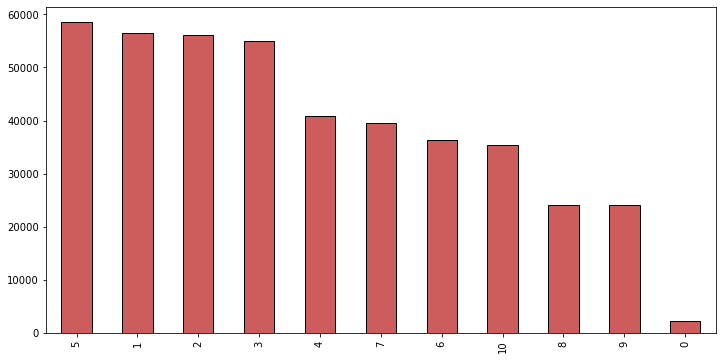

In [6]:
plt.figure(figsize=(12,6))
df['council_district'].value_counts().plot.bar(color='indianred', edgecolor='black')

### Takwaways:
- Districts 1, 2, 3, & 5 have higher reports
- District 0 has nearly no reports in comparison to the others
- 4, 6, 7, 8, 9, & 10 still have many reports but not as much as 1, 2, 3, and 5

<AxesSubplot:xlabel='council_district', ylabel='days_open'>

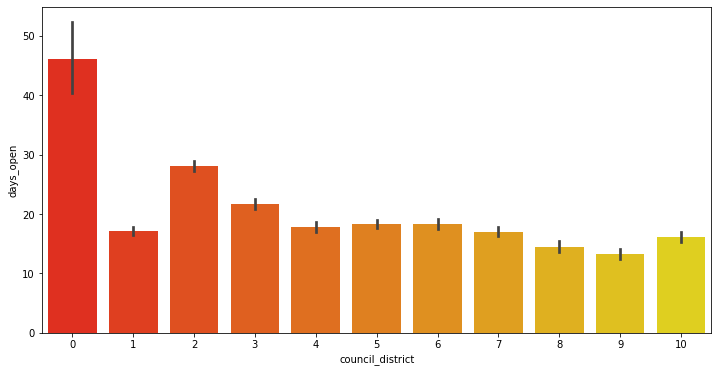

In [7]:
plt.figure(figsize=(12,6))
sns.barplot(data=train, x=train.council_district, y='days_open', palette='autumn')

<AxesSubplot:xlabel='council_district', ylabel='count'>

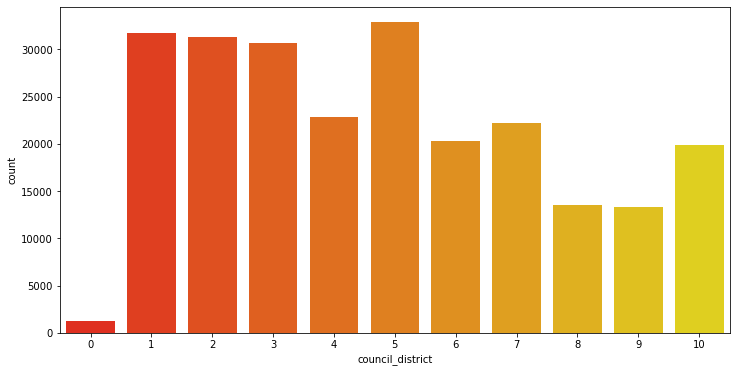

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(data=train, x=train.council_district, palette='autumn')

## Takeaways:
- District has minimal amount of cases.


___

#### Days Open

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


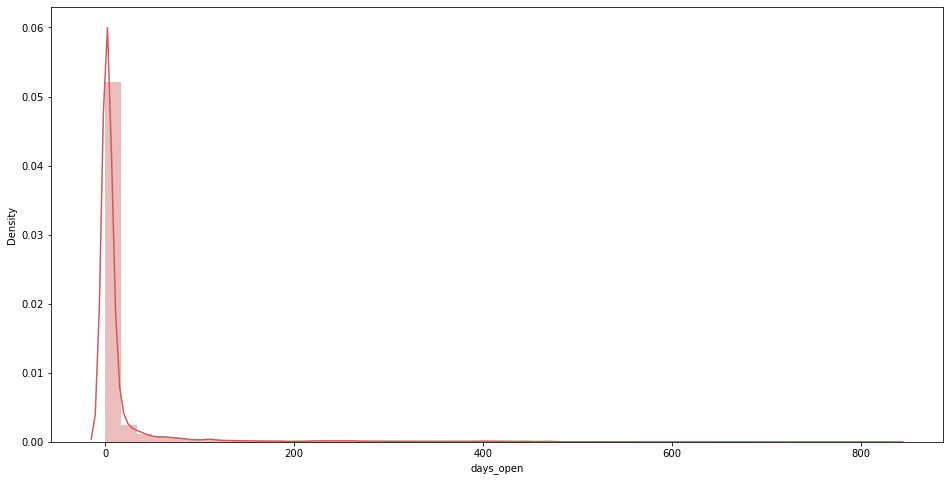

In [9]:
plt.figure(figsize=(16,8))
sns.distplot(df.days_open, color='indianred')
plt.show()

### Takeaways:
- definatly skewed right
- was worse before removing outliers over 1400 days
- not willing to remove any more for the ingrity of the data frame

___

#### Days Until Resolution is Due

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


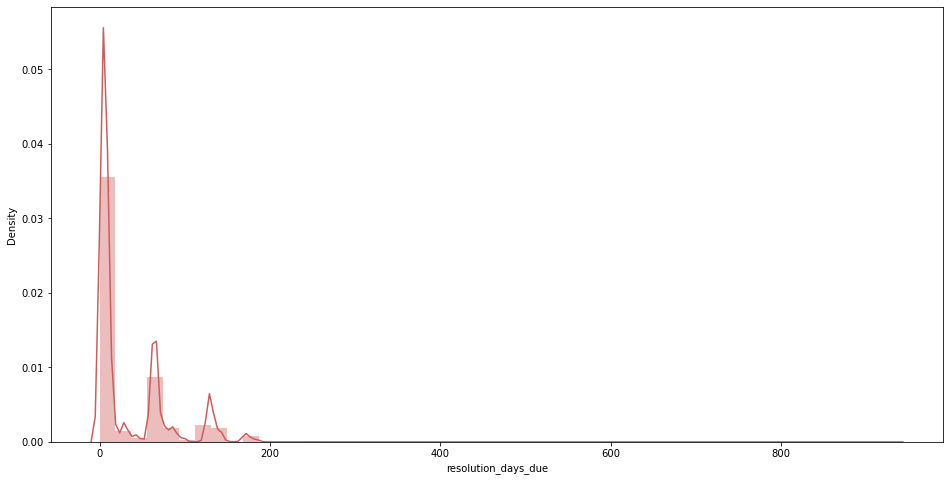

In [10]:
plt.figure(figsize=(16,8))
sns.distplot(df.resolution_days_due, color='indianred')
plt.show()

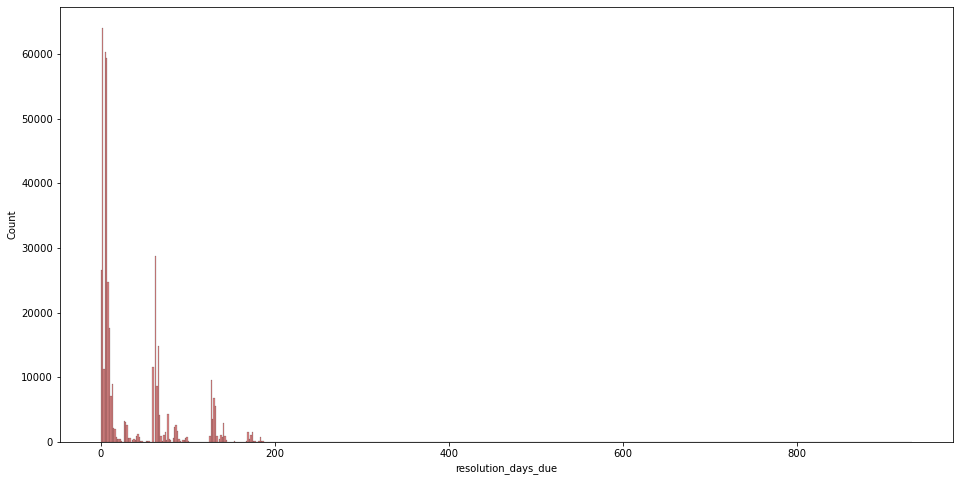

In [11]:
plt.figure(figsize=(16,8))
sns.histplot(df.resolution_days_due, color='indianred')
plt.show()

### Takeaways:
- Skewed right
- Can see a few different spikes but cant see where these are
    - all spikes are between 0 and 200 days open

___

#### Days Before or After Due Date the Resolution was Made

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


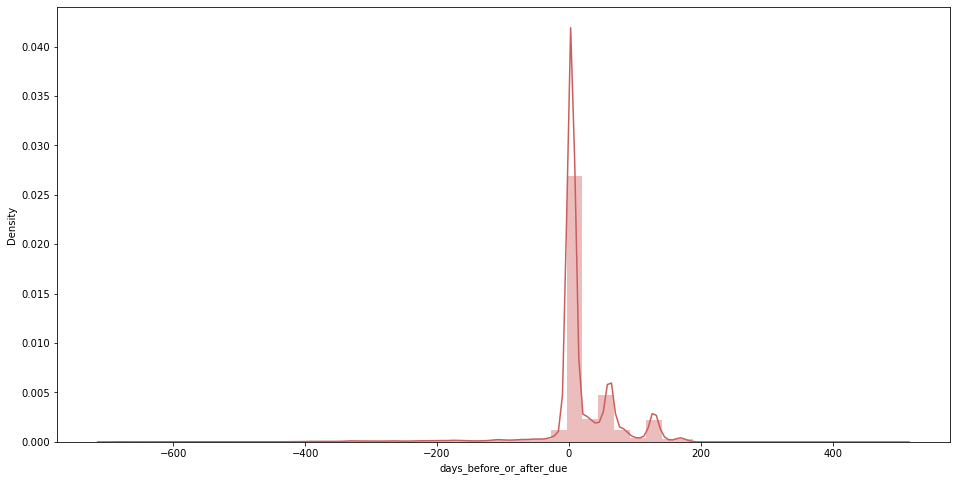

In [12]:
plt.figure(figsize=(16,8))
sns.distplot(df.days_before_or_after_due, color='indianred')
plt.show()

### Takeaways:
- There are more spikes in the casescompleted before due
- The later after the due date the more it trails off

___

## Bivariate

### Council District and Level of Delay

<AxesSubplot:title={'center':'Delay Levels Accross Districts'}, xlabel='level_of_delay', ylabel='count'>

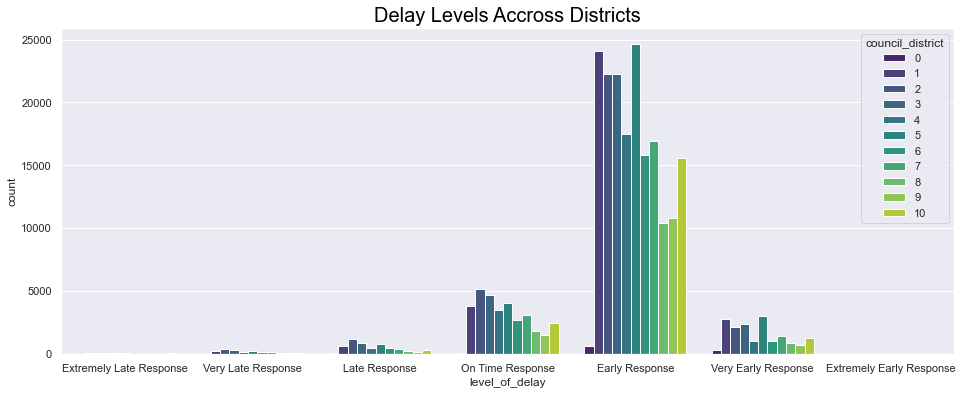

In [78]:
plt.figure(figsize=(16,6))
plt.title("Delay Levels Accross Districts", size=20, color='black')
sns.countplot(x='level_of_delay', hue='council_district', data=train,
               palette='viridis')

### Takeaways:
- District 0, 8, and 9 have far less early responses
    - but this is because the have called far less calls compared to all other districts
- it seems that the more we more right and left the lower the numbers get
- Early responses are far more common than any other level of delay

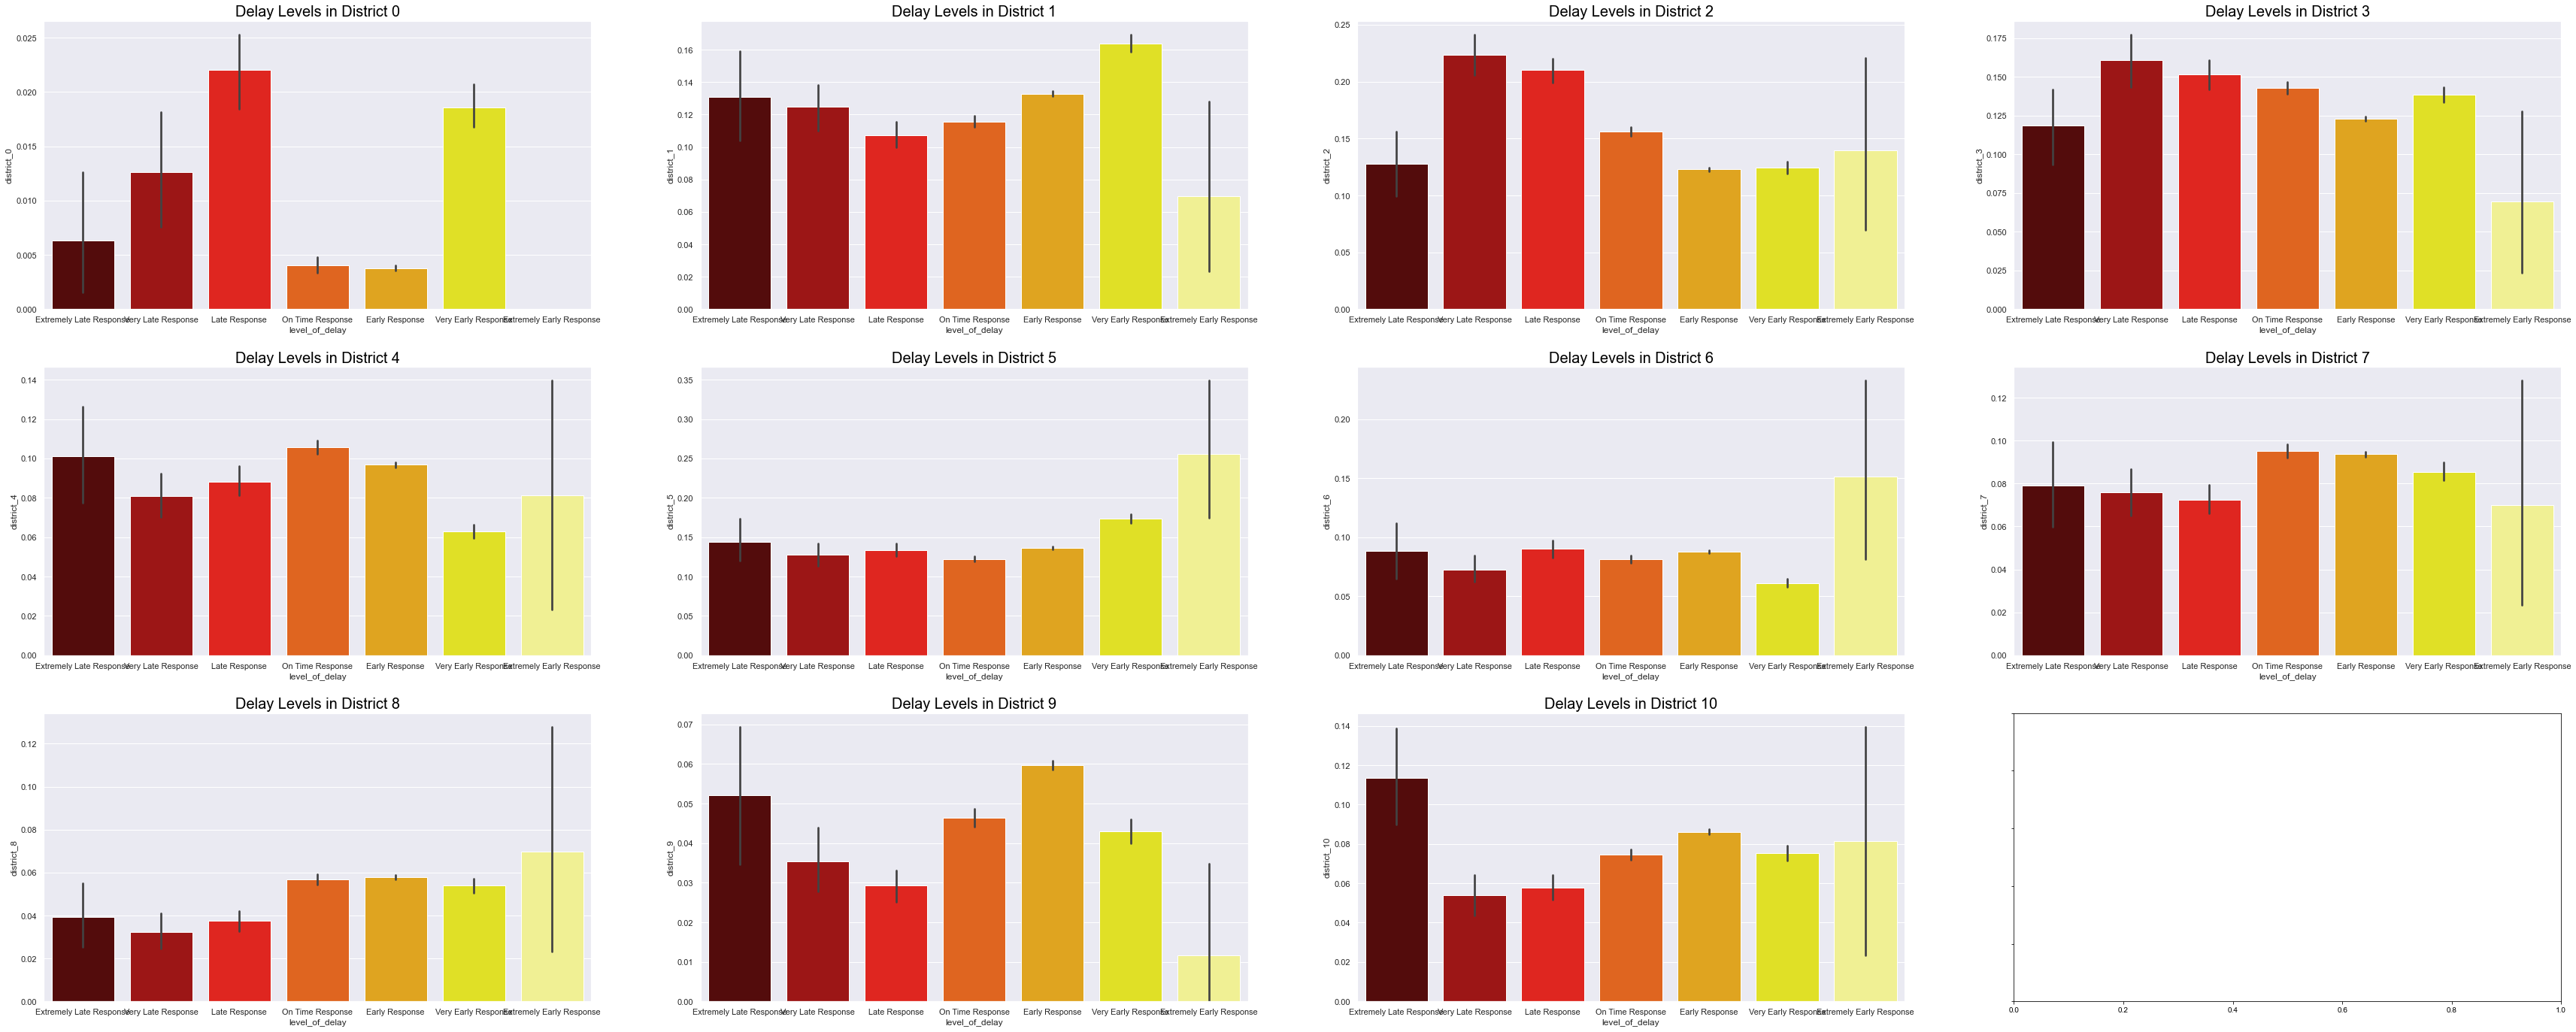

In [14]:
plt.subplots(3, 4, figsize=(60,24), sharey=True)
sns.set(style="darkgrid")


plt.subplot(3,4,1)
plt.title("Delay Levels in District 0", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_0', data=train,
               palette='hot')

plt.subplot(3,4,2)
plt.title("Delay Levels in District 1", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_1', data=train,
               palette='hot')

plt.subplot(3,4,3)
plt.title("Delay Levels in District 2", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_2', data=train,
               palette='hot')

plt.subplot(3,4,4)
plt.title("Delay Levels in District 3", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_3', data=train,
               palette='hot')

plt.subplot(3,4,5)
plt.title("Delay Levels in District 4", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_4', data=train,
               palette='hot')

plt.subplot(3,4,6)
plt.title("Delay Levels in District 5", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_5', data=train,
               palette='hot')

plt.subplot(3,4,7)
plt.title("Delay Levels in District 6", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_6', data=train,
               palette='hot')

plt.subplot(3,4,8)
plt.title("Delay Levels in District 7", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_7', data=train,
               palette='hot')

plt.subplot(3,4,9)
plt.title("Delay Levels in District 8", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_8', data=train,
               palette='hot')

plt.subplot(3,4,10)
plt.title("Delay Levels in District 9", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_9', data=train,
               palette='hot')

plt.subplot(3,4,11)
plt.title("Delay Levels in District 10", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_10', data=train,
               palette='hot')

plt.show()

### Takeaways:
- District 0
    - has more late to extremely late reponses than any other response level
    - Does have a largeamound of very early response times, but the late responses still outweight the early
    - Have minimal percent of each delay level
        - highest percentages are that of 
            - very early, making up for only 2% of all very early responses
            - late, making up for only 1.9% of all the late responses in SA
- District 1
    - Mostly early response times
        - Makes up for about 16% of all early responses
    - Makes up for ~ 13.7% of all extremely late responses
    - Made up of:
        - North of downtown
        - north downtown
- District 2
    - makes up for 15% of all Extremely late responses
    - makes up for 22% of all very late responses
    - makes up for 21% of all very late responses
    - has far more late responses than they do early/on time
    - this is the far east side of SA
- District 3
    - this is the south east side of san antonio
    - makes up for 
        - about 16% of all very late resposes
        - 14.7% of all late repsonses
        - 14.3% of on time responses
        - 13% of all very early responses
    - This seems to be fairly even but does still lean towards the later side.
- District 4
    - this is the south west side of san antonio
    - very low percentages accross the board
    - highest is on time responses holding about 10.2% of all on time calls
- District 5
    - Has about 23% of all extremely early responses
    - Hold more early responses than that of late
    - Made up of:
        - West of downtown SA
        - South downtown area
- District 6
    - Hold approximatly 22% of all extrememly early responses
        - appears to be the west side of San anotnio
    - This is the west side of San antonio
- District 7
    - skews slightly towards more early responses
- District 8
    - minimal calls in this district
    - leans more towards early, but extremely late response does spike
    - Castle hills, Anaqua Springs Ranch, dominion, and Bently Manor are located in this district
        - Luxury neighborhoods
- District 9
    - location of hill country villiage
        - Luxury neighborhood
    - minimal calls but has far more extremely late compared to the other levels of response time
    - the decond most common response time is on time responses
- District 10
    - the north west side of SA
    - makes up for about 10% of all extremely late responses

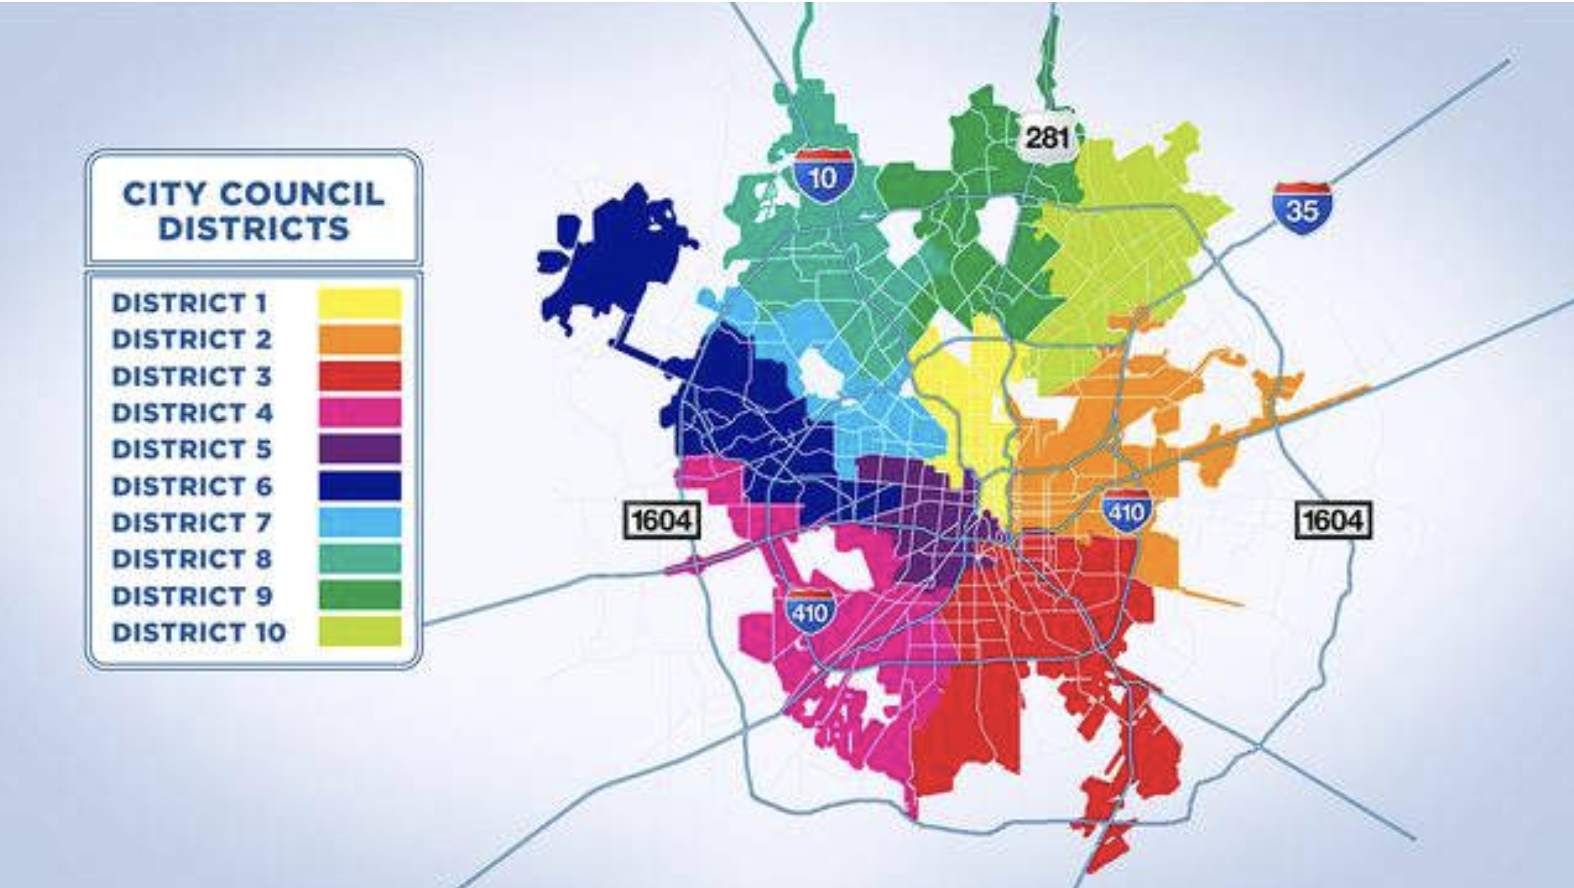

___

## Is the average number of calls in an area affect the response time?

In [15]:
def create_district_train(train):
    '''
    This function takes in the original dataframe and returns
    a dataframe with the quantitative variables averaged by district
    for easier exploration
    '''
    # Creating a dataframe with zipcode and a "days_open" averaged column
    district_train = pd.DataFrame(df.groupby('council_district').days_open.mean()).reset_index()
    # Adding a "days_before_or_after_due" averaged column
    district_train['days_before_or_after_due_mean'] = pd.DataFrame(df.groupby('council_district').days_before_or_after_due.mean()).reset_index()['days_before_or_after_due']
    # Adding a "resolution_days_due" averaged column
    district_train['resolution_days_due_mean'] = pd.DataFrame(df.groupby('council_district').resolution_days_due.mean()).reset_index()['resolution_days_due']
    # Adding a "days_open" median column
    district_train['days_open_med'] = pd.DataFrame(df.groupby('council_district').days_open.median()).reset_index()['days_open']
    # Adding a "days_before_or_after_due" median column
    district_train['days_before_or_after_due_med'] = pd.DataFrame(df.groupby('council_district').days_before_or_after_due.median()).reset_index()['days_before_or_after_due']
    # Adding a "resolution_days_due" median column
    district_train['resolution_days_due_med'] = pd.DataFrame(df.groupby('council_district').resolution_days_due.median()).reset_index()['resolution_days_due']
    return district_train

In [16]:
district_train = create_district_train(train)
district_train

council_district  days_open  days_before_or_after_due_mean  \
0                  0  45.368153                      13.940977   
1                  1  17.194002                      19.870317   
2                  2  28.222183                       6.675377   
3                  3  21.912202                      10.890344   
4                  4  18.104565                       9.032608   
5                  5  18.379935                      15.815925   
6                  6  18.155286                      11.069879   
7                  7  17.078971                      14.569513   
8                  8  15.237999                      14.914616   
9                  9  13.240826                      11.936316   
10                10  15.916747                      13.040651   

    resolution_days_due_mean  days_open_med  days_before_or_after_due_med  \
0                  59.309130            0.0                           9.0   
1                  37.064319            1.0                           5.0   
2                  34.897560            2.0                           4.0   
3                  32.802546            2.0                           4.0   
4                  27.137173            1.0                           4.0   
5                  34.195860            1.0                           5.0   
6                  29.225165            2.0                           5.0   
7                  31.648483            2.0                           5.0   
8                  30.152615            2.0                           5.0   
9                  25.177142            2.0                           4.0   
10                 28.957397            2.0                           5.0   

    resolution_days_due_med  
0                        60  
1                         9  
2                         8  
3                         7  
4                         7  
5                         7  
6                         7  
7                         7  
8                         7  
9                         7  
10                        7

<AxesSubplot:xlabel='council_district', ylabel='days_before_or_after_due_mean'>

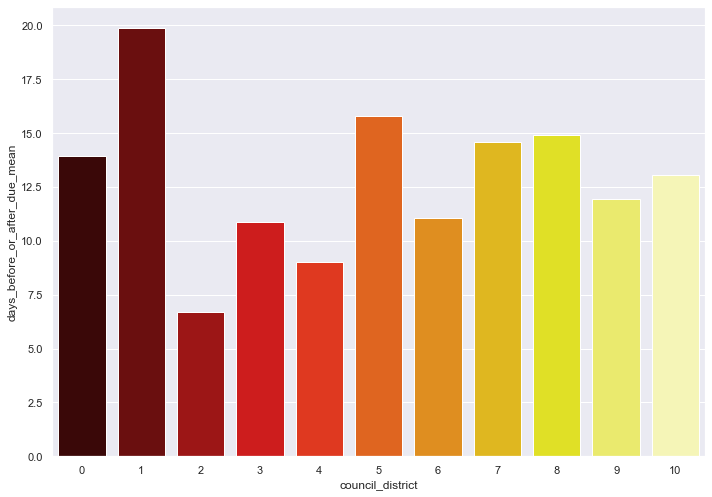

In [17]:
sns.barplot(data = district_train, x = 'council_district', y = 'days_before_or_after_due_mean', palette = "hot")

## Takeaways:
- It seems as though council district 2 on average has the slowest 3-1-1 call response time
- While Distrcit 1 has the fastest averge response time
- Districts 0, 7, and 8 have around the same average ranging between 12.5 nd 15.0 days

## Days open and resolution days 

<AxesSubplot:xlabel='days_open', ylabel='resolution_days_due'>

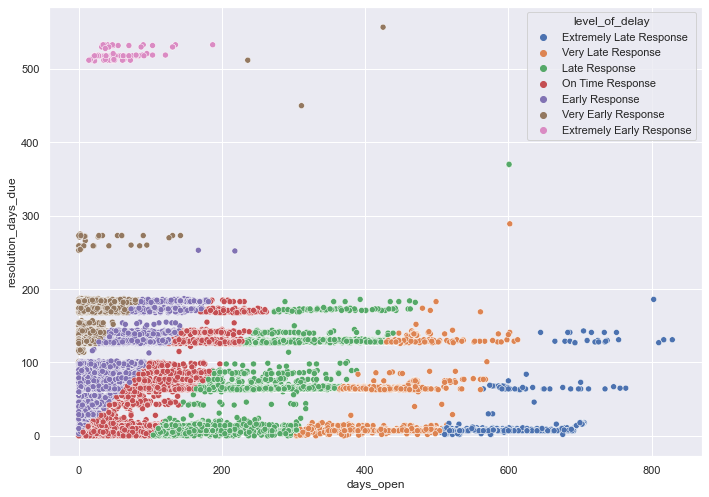

In [18]:
sns.scatterplot(data=train, x='days_open', y='resolution_days_due', hue='level_of_delay')

<AxesSubplot:xlabel='days_open', ylabel='resolution_days_due'>

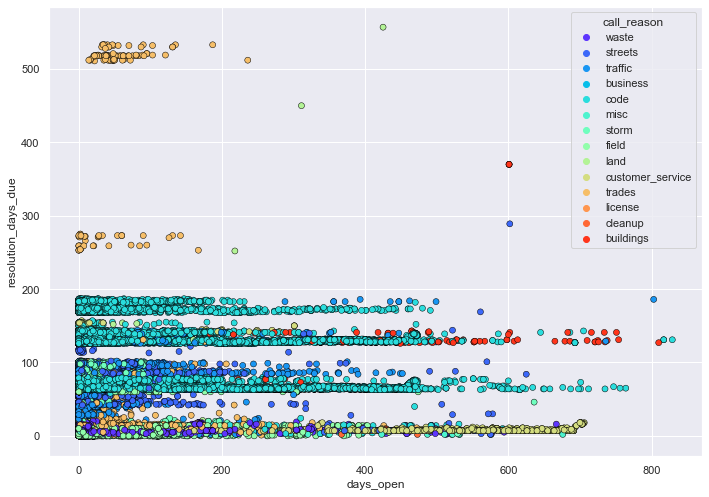

In [19]:
sns.scatterplot(data=train, x='days_open', y='resolution_days_due', palette='rainbow', edgecolor='black',
                hue='call_reason')

<AxesSubplot:xlabel='days_open', ylabel='resolution_days_due'>

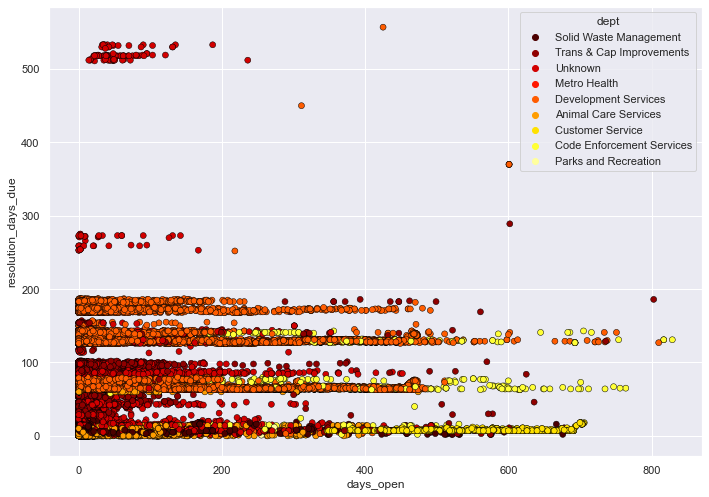

In [20]:
sns.scatterplot(data=train, x='days_open', y='resolution_days_due', palette='hot', edgecolor='black',
                hue='dept')

<AxesSubplot:xlabel='days_open', ylabel='resolution_days_due'>

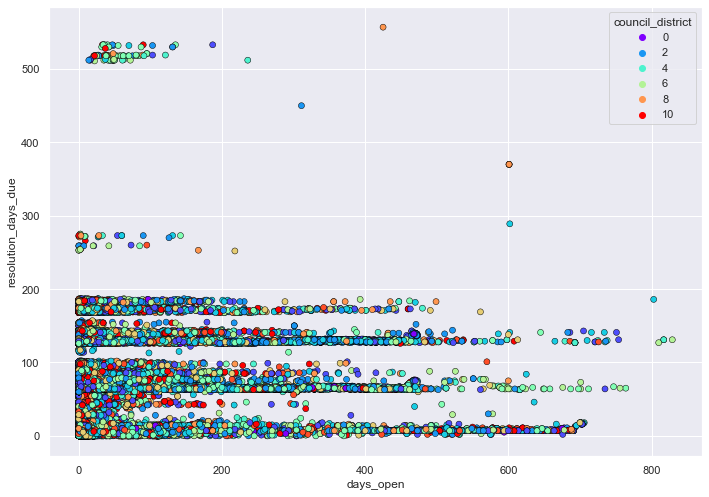

In [21]:
sns.scatterplot(data=train, x='days_open', y='resolution_days_due', palette='rainbow', edgecolor='black',
                hue='council_district')

## Takeaways:
- most early responses are calls about trades in unknown departments.

___

## How does the form of reporting affect delay level?

In [22]:
df.source_id.value_counts()

Web Portal                    354640
311 Mobile App                 40620
Constituent Call               33200
Internal Services Requests       410
Name: source_id, dtype: int64

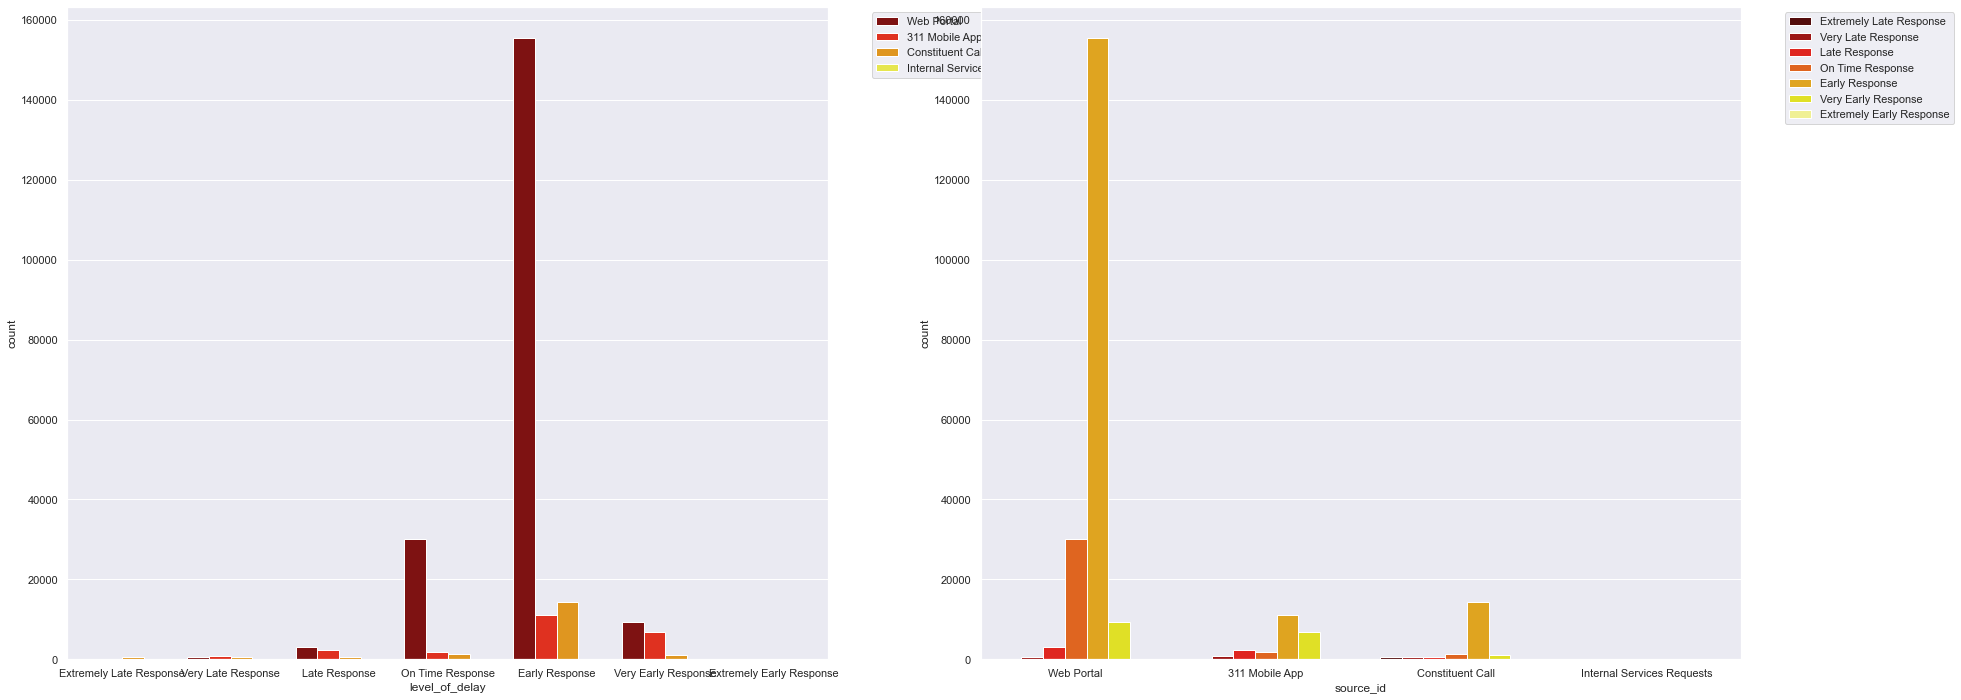

In [23]:
plt.subplots(1, 2, figsize=(30,12), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,2,1)
sns.countplot(data=train, hue='source_id', x='level_of_delay', palette = "hot")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(1,2,2)
sns.countplot(data=train, x='source_id', hue='level_of_delay', palette = "hot")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

Text(0.5, 1.0, 'Delay level vs. resolution days due')

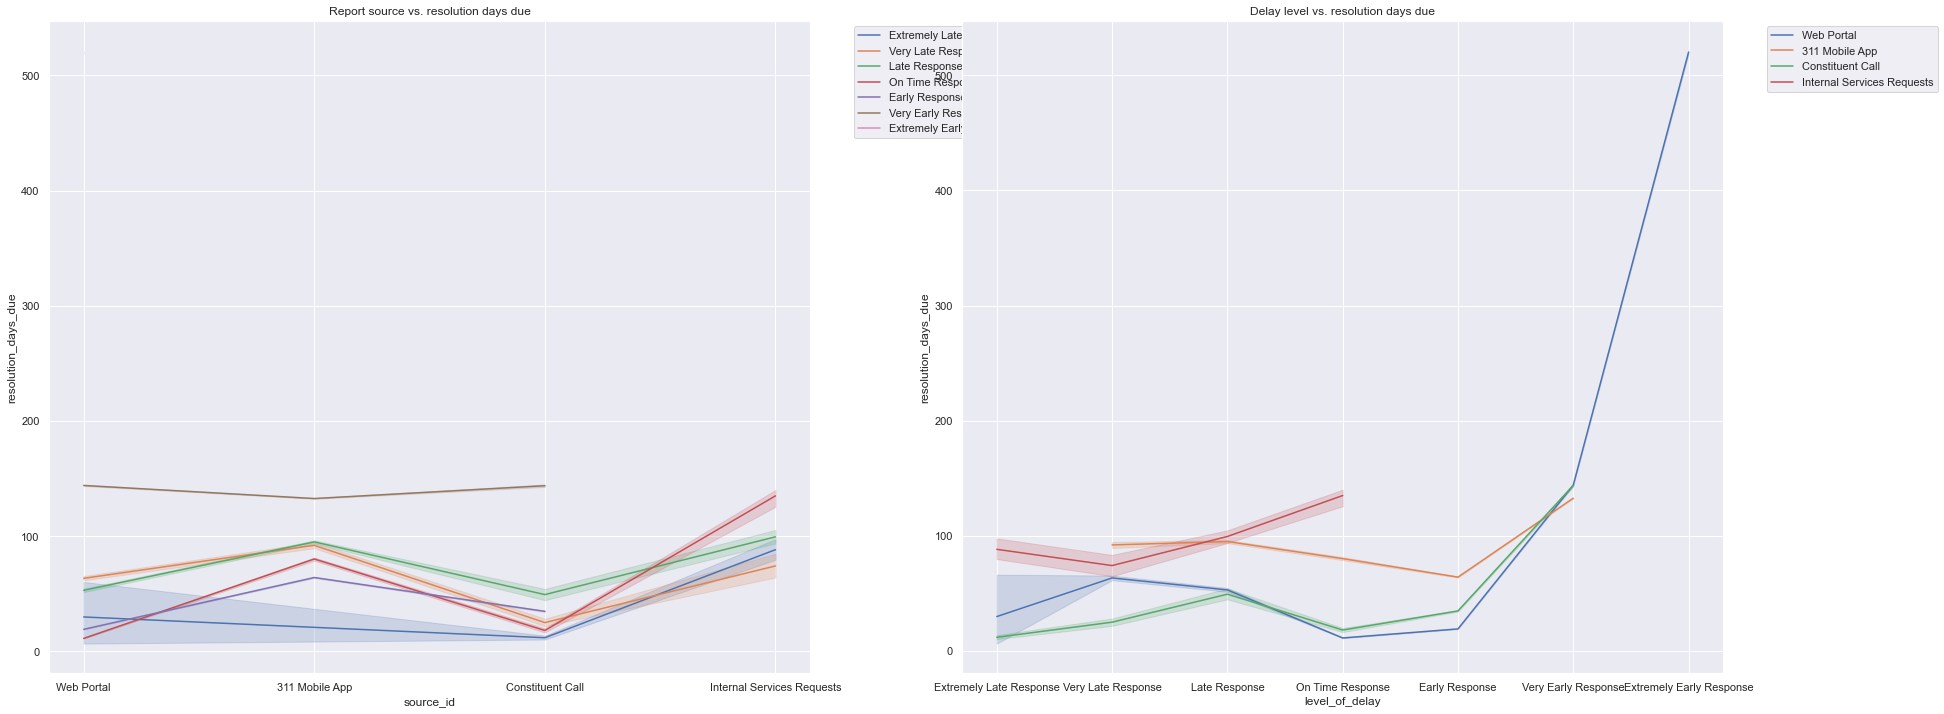

In [24]:
plt.subplots(1, 2, figsize=(30,12), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,2,1)
sns.lineplot(data=train, x="source_id", y="resolution_days_due", hue='level_of_delay')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Report source vs. resolution days due")

plt.subplot(1,2,2)
sns.lineplot(data=train, x="level_of_delay", y="resolution_days_due", hue='source_id')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Delay level vs. resolution days due")

## Takeaways:
- There seem to be a spike for Web Portal report from very early to early response times.

Text(0.5, 1.0, 'Delay level vs. resolution days due')

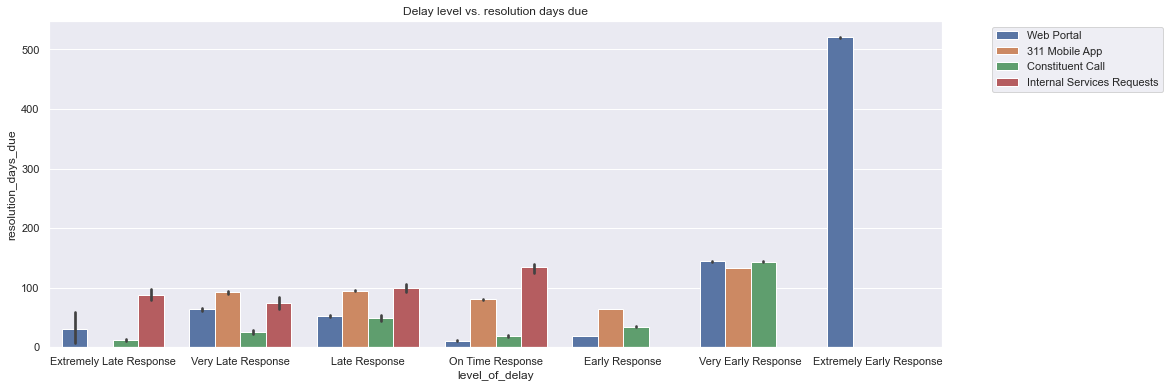

In [25]:
plt.figure(figsize=(16,6))
sns.barplot(data=train, x="level_of_delay", y="resolution_days_due", hue='source_id')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Delay level vs. resolution days due")

## Takeaways:
- The ONLY reporting system in the Extremely early delay level is Web Portal
    - Although it does hold the higheest number of reports, I am left wondering why there are no cases from mobil ape, call, and internal resquest are being completed extremeley early.

Text(0.5, 1.0, 'Delay level vs. days open')

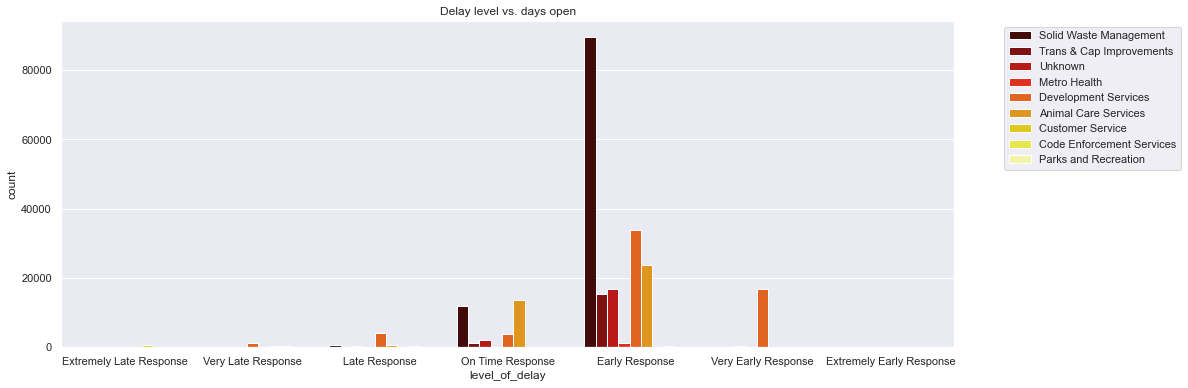

In [26]:
plt.figure(figsize=(16,6))
sns.countplot(data=train, x="level_of_delay", hue='dept', palette='hot')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Delay level vs. days open")

## Takeaways:
- 

# What depatments are being asigned most calls in each district?

<AxesSubplot:title={'center':'Delay Levels in District 0'}, xlabel='dept', ylabel='district_0'>

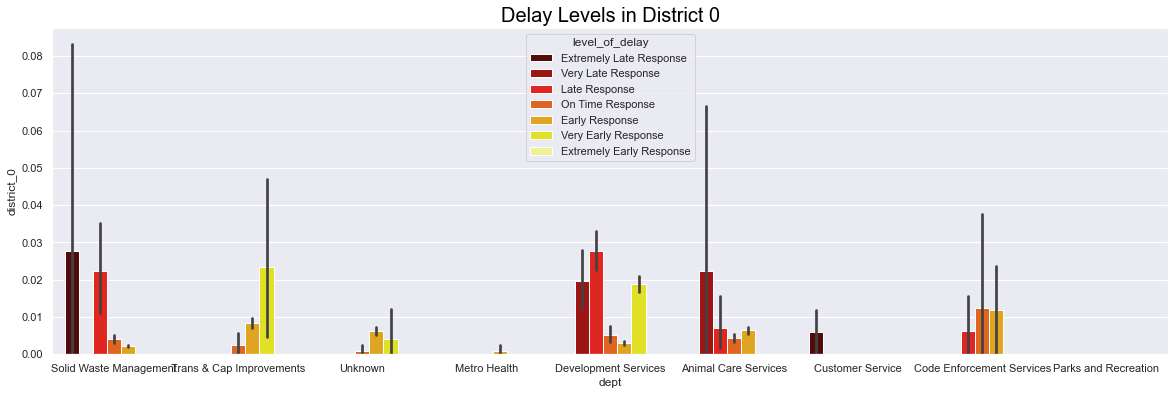

In [40]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 0", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_0',  hue='level_of_delay', data=train,
               palette='hot')


## Takeaways:
- More calls about waste, development, and animal services

<AxesSubplot:title={'center':'Delay Levels in District 1'}, xlabel='dept', ylabel='district_1'>

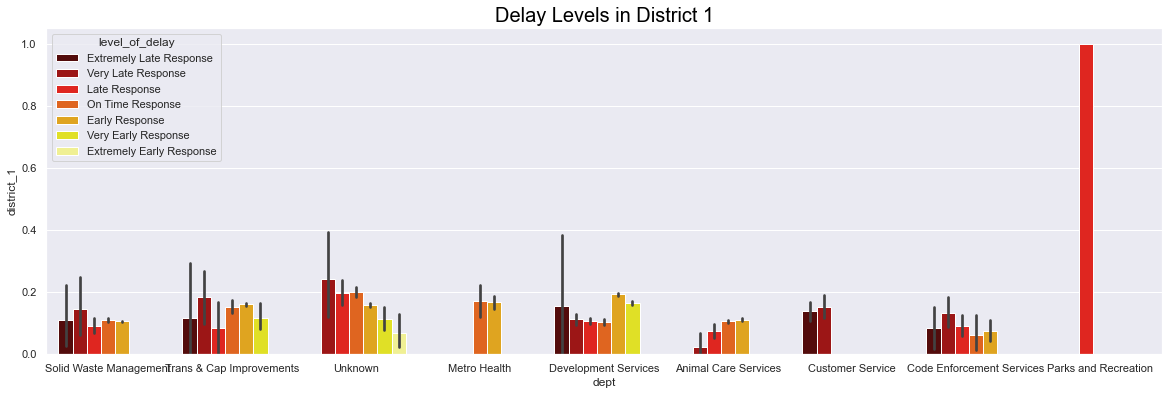

In [29]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 1", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_1', hue='level_of_delay', data=train,
               palette='hot')

## Takeaways:
- District 1 makes up for 100% of the Park's and Recreation department calls
    - all of which are late response times

<AxesSubplot:title={'center':'Delay Levels in District 2'}, xlabel='dept', ylabel='district_2'>

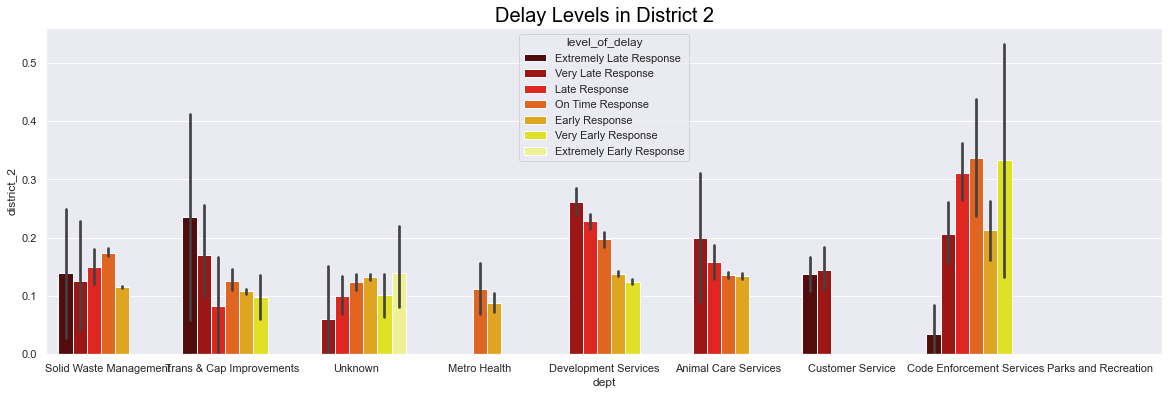

In [30]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 2", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_2', hue='level_of_delay', data=train,
               palette='hot')

## Takeaways:
- Most of district 2's calls are handed off to code enforcement, and development
- District 2 is usually fairly distributed in delay levels
    - except tans & Cap imporivemnets has a spike in the late and so does customer care (suprising I know)

<AxesSubplot:title={'center':'Delay Levels in District 3'}, xlabel='dept', ylabel='district_3'>

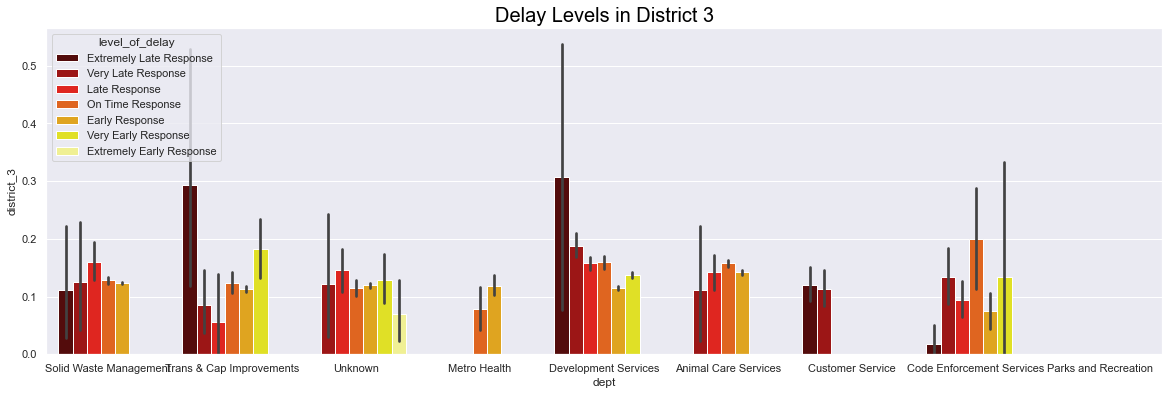

In [31]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 3", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_3', hue='level_of_delay', data=train,
               palette='hot')

## Takeaways:
- Development Services Department Had been slacking
    - Makes up for ~31% of all of this departments extremely late responses
- Trans And Cap dept is also slacking in district 3
    - Makes up for ~ 29% of all of this departments extremely late responses

<AxesSubplot:title={'center':'Delay Levels in District 4'}, xlabel='dept', ylabel='district_4'>

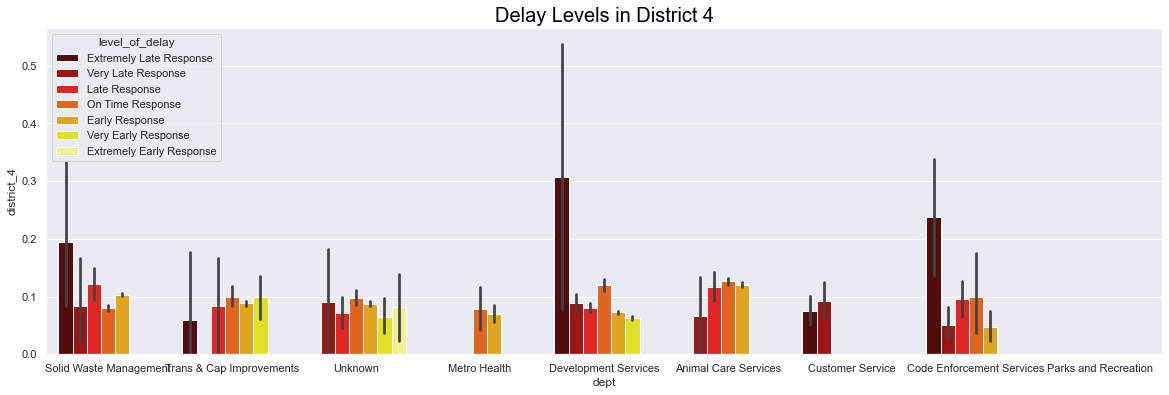

In [32]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 4", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_4', hue='level_of_delay', data=train,
               palette='hot')

## Takeaways:
- District 4's Development Services Department Had been slacking
    - Makes up for ~31% of all of this departments extremely late responses

<AxesSubplot:title={'center':'Delay Levels in District 5'}, xlabel='dept', ylabel='district_5'>

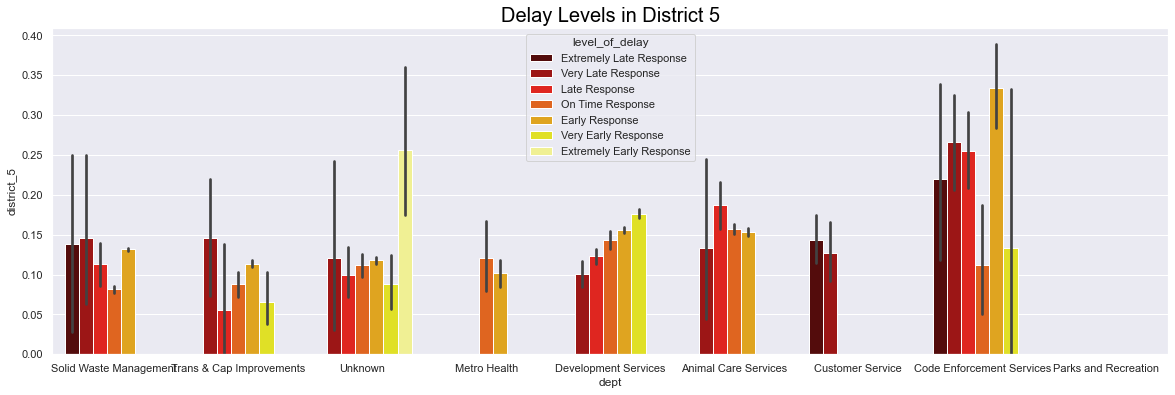

In [33]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 5", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_5', hue='level_of_delay', data=train,
               palette='hot')

## Takeaways:
- Code Enforcement department be working overtime
    - everything in this department is pretty high with the exceotio of on time responses, adnd extrememly early responses.

<AxesSubplot:title={'center':'Delay Levels in District 6'}, xlabel='dept', ylabel='district_6'>

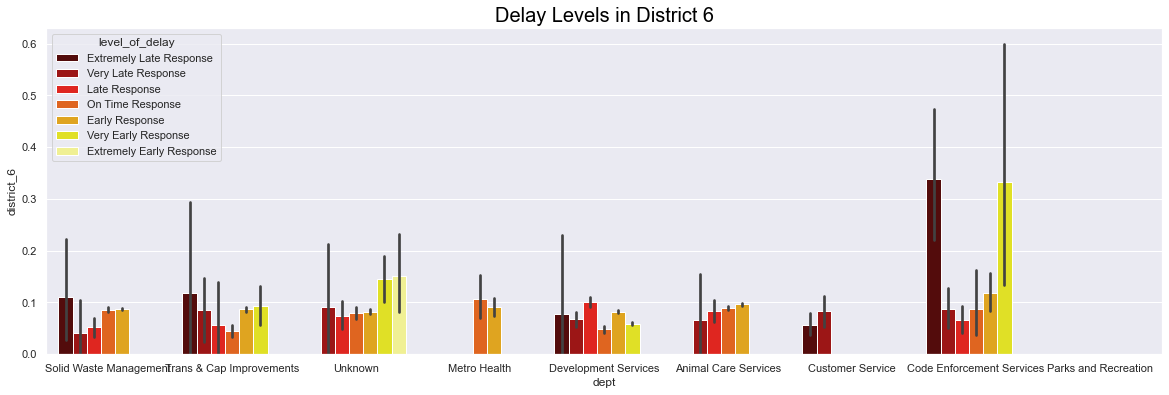

In [34]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 6", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_6', hue='level_of_delay', data=train,
               palette='hot')

## Takeaways:
- Code enforcement is high on both extremes in distrcit 6

<AxesSubplot:title={'center':'Delay Levels in District 7'}, xlabel='dept', ylabel='district_7'>

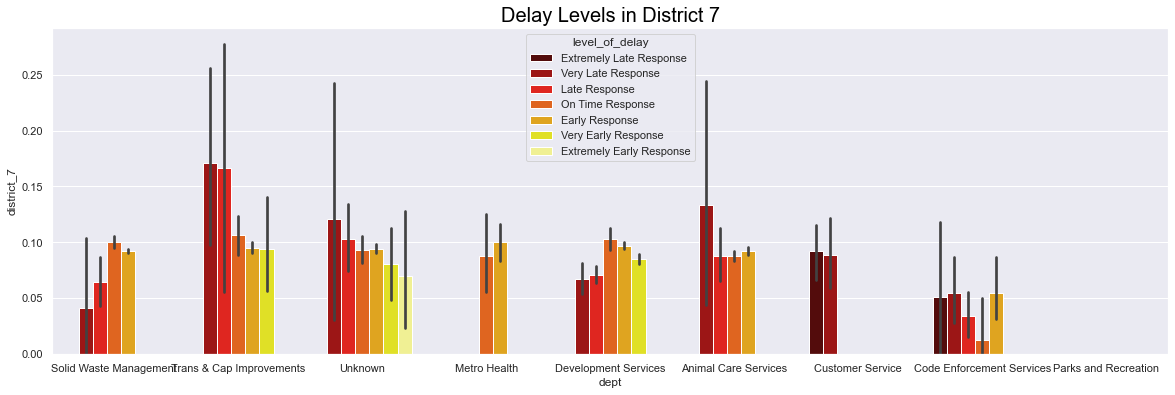

In [35]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 7", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_7', hue='level_of_delay', data=train,
               palette='hot')

## Takeaways:
- District 7 tend to be responded to later rather than earlier accross all departments except solid waste, and metro health

<AxesSubplot:title={'center':'Delay Levels in District 8'}, xlabel='dept', ylabel='district_8'>

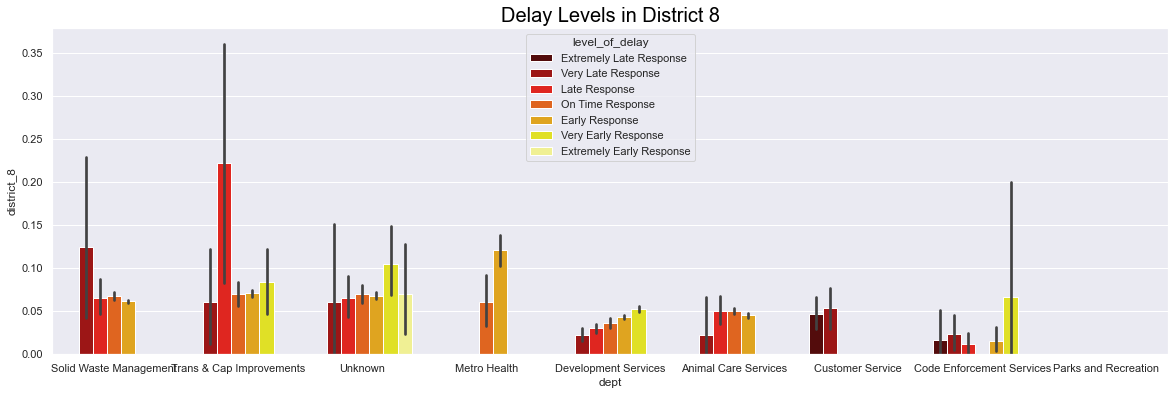

In [36]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 8", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_8', hue='level_of_delay', data=train,
               palette='hot')

<AxesSubplot:title={'center':'Delay Levels in District 9'}, xlabel='dept', ylabel='district_9'>

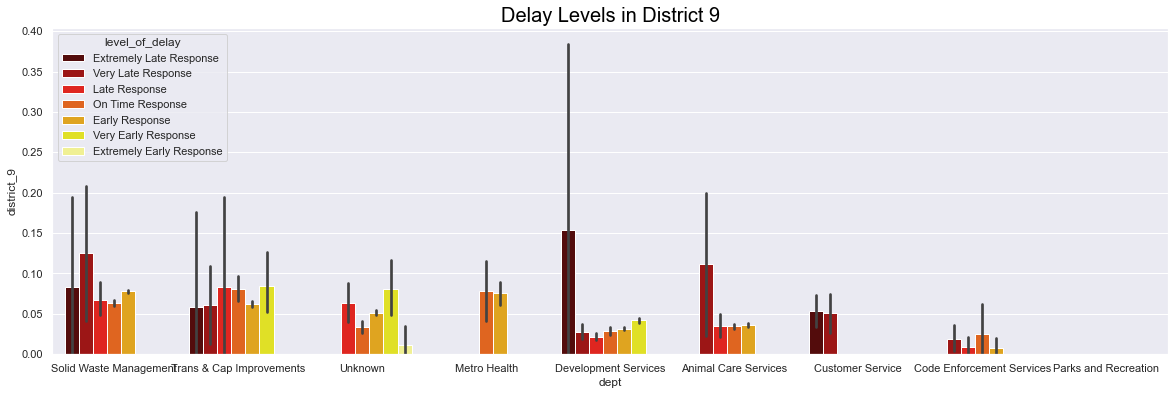

In [37]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 9", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_9', hue='level_of_delay', data=train,
               palette='hot')

## Takeaways:
- District 9 has a spike in their extremely late repsonses from the Development services

<AxesSubplot:title={'center':'Delay Levels in District 10'}, xlabel='dept', ylabel='district_10'>

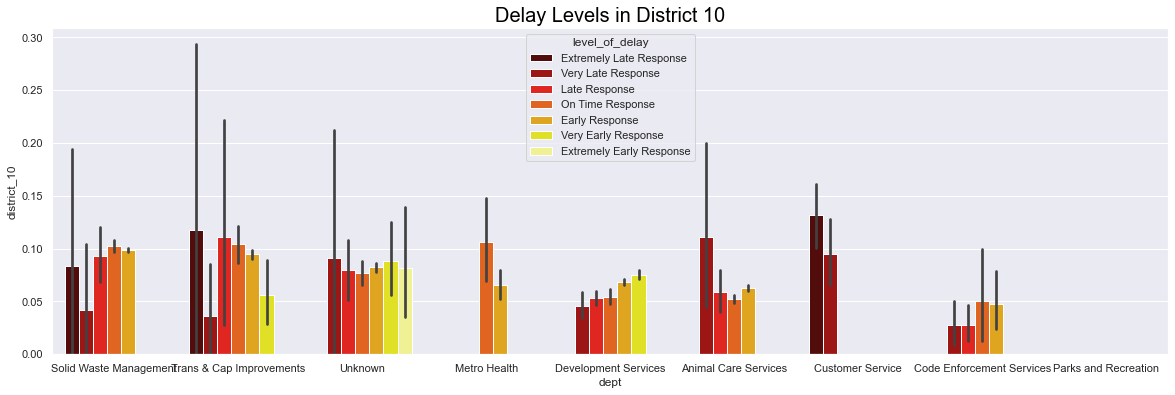

In [38]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 10", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_10', hue='level_of_delay', data=train,
               palette='hot')

## Takeaways from all department district delays:
- More calls about waste, development, and animal services in district 0
    - but overall hardly any calls are happening in this district.
- District 1 makes up for 100% of the Park's and Recreation department calls
    - all of which are late response times
- Most of district 2's calls are handed off to code enforcement, and development
- District 2 is usually fairly distributed in delay levels
    - except tans & Cap imporivemnets has a spike in the late and so does customer care (suprising I know)
- Development Services Department Had been slacking
    - Makes up for ~31% of all of this departments extremely late responses
- Trans And Cap dept is also slacking in district 3
    - Makes up for ~ 29% of all of this departments extremely late responses
- District 4's Development Services Department Had been slacking
    - Makes up for ~31% of all of this departments extremely late responses
- Code Enforcement department be working  in District 5
    - everything in this department is pretty high with the exceotio of on time responses, adnd extrememly early responses.
- Code enforcement is high on both extremes in distrcit 6
- District 7 tend to be responded to later rather than earlier accross all departments except solid waste, and metro health
- District 9 has a spike in their extremely late repsonses from the Development services

<AxesSubplot:title={'center':'Department Delays in District 0'}, xlabel='dept', ylabel='count'>

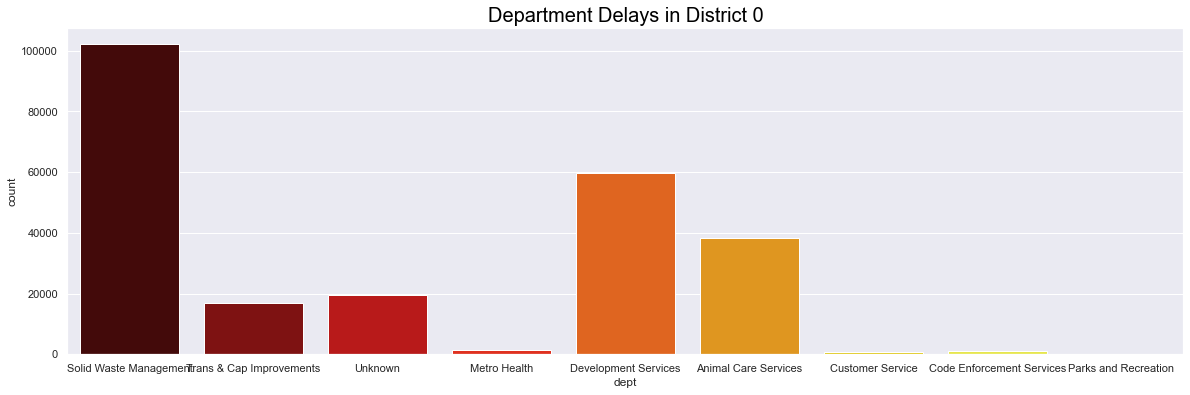

In [66]:
plt.figure(figsize=(20,6))
plt.title("Department Delays in District 0", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='dept', data=train,
               palette='hot')

# Call Reason Delays per District

<AxesSubplot:title={'center':'Department Delays in District 0'}, xlabel='call_reason', ylabel='district_0'>

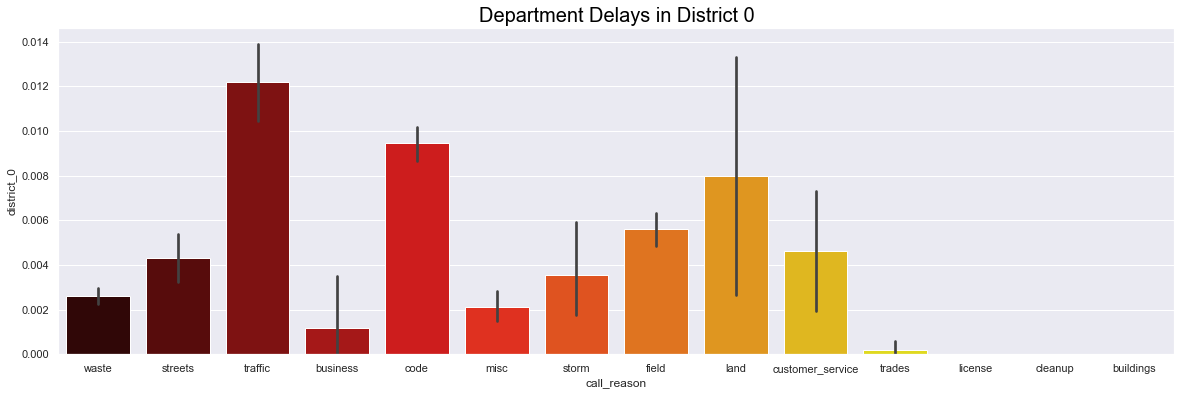

In [62]:
plt.figure(figsize=(20,6))
plt.title("Department Delays in District 0", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_0', data=train,
               palette='hot')

<AxesSubplot:title={'center':'Department Delays in District 0'}, xlabel='call_reason', ylabel='district_0'>

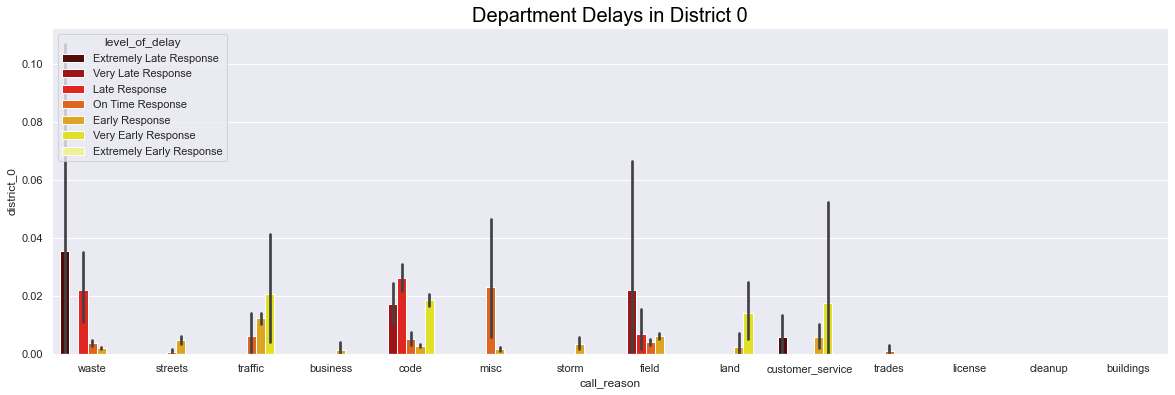

In [60]:
plt.figure(figsize=(20,6))
plt.title("Department Delays in District 0", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_0', hue='level_of_delay', data=train,
               palette='hot')

## Takeaways:
- District 0
    - Most calls are about traffic and code violations
    - Waste is pretty late
    - traffic is usually on time or early
    - Code violations lean more towards the late side, but does have a spike at very early response times
    - field calls tend to be on the very late side of response times

<AxesSubplot:title={'center':'Call Reason Delays in District 1'}, xlabel='call_reason', ylabel='district_1'>

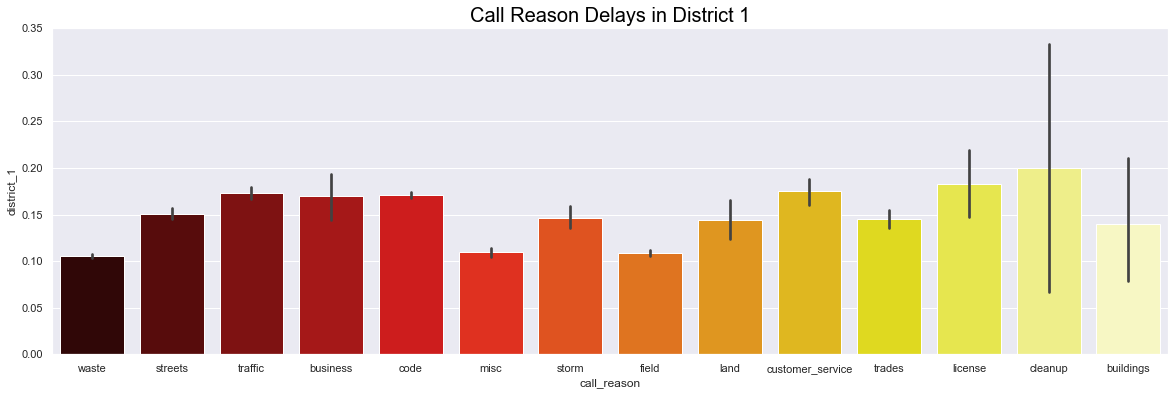

In [63]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in District 1", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_1', data=train,
               palette='hot')

<AxesSubplot:title={'center':'Call Reason Delays in District 1'}, xlabel='call_reason', ylabel='district_1'>

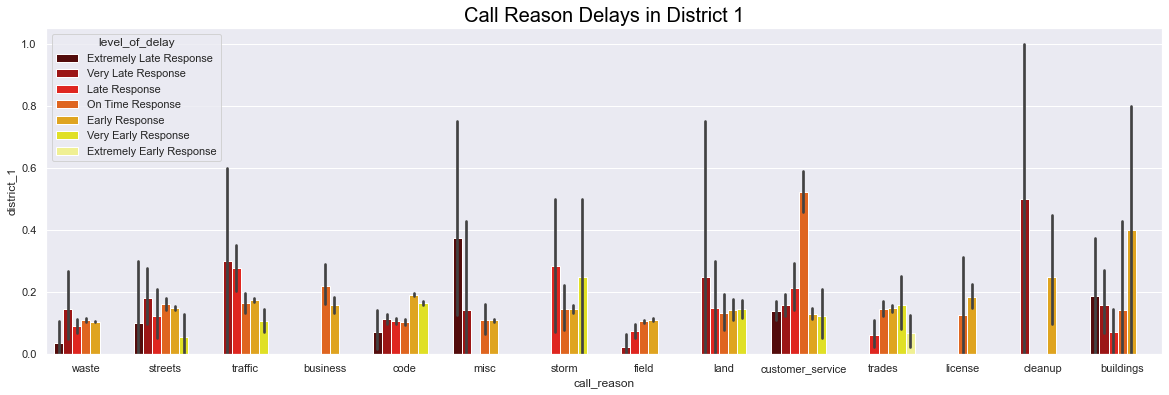

In [59]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in District 1", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_1', hue='level_of_delay', data=train,
               palette='hot')

## Takeaways:
- District 1
    - Pretty even distribution of call reasons
    - For once customer services arent high in late responses but rather have an overwhelming amount of on time responses.
    - Clean up calls tend to either be early or very late
    - for once cs isnt total trash

<AxesSubplot:title={'center':'Call Reason Delays in District 2'}, xlabel='call_reason', ylabel='district_2'>

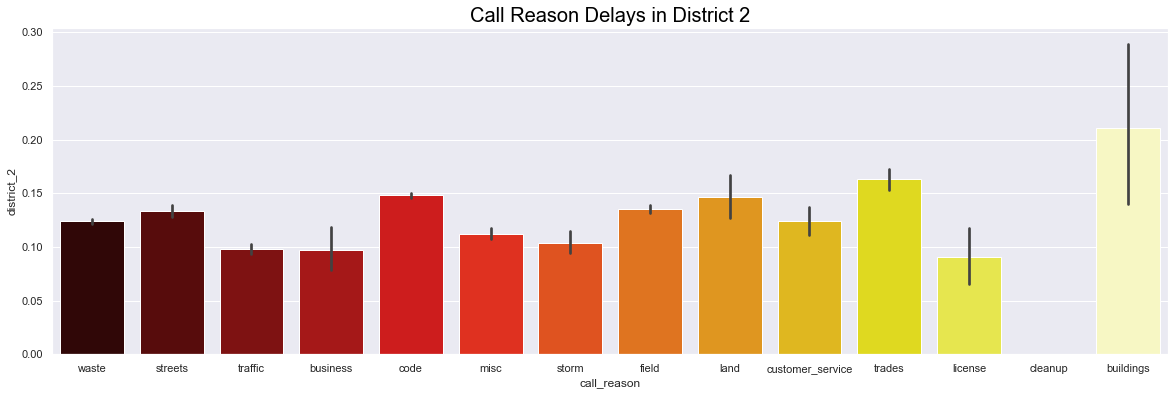

In [65]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in District 2", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_2', data=train,
               palette='hot')

<AxesSubplot:title={'center':'Call Reason Delays in District 2'}, xlabel='call_reason', ylabel='district_2'>

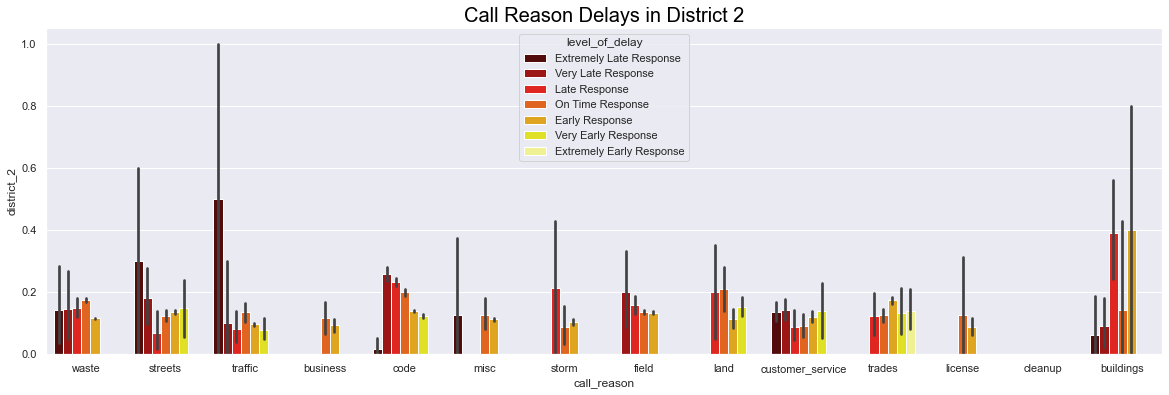

In [64]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in District 2", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_2', hue='level_of_delay', data=train,
               palette='hot')

## Takeaways:
- District 2
    - Traffic seems to be pretty neglected in district 2
        - holy extremely late responses batman
            - makes up for nearly 50% of all of the extremely late tradfic related calls made in SA

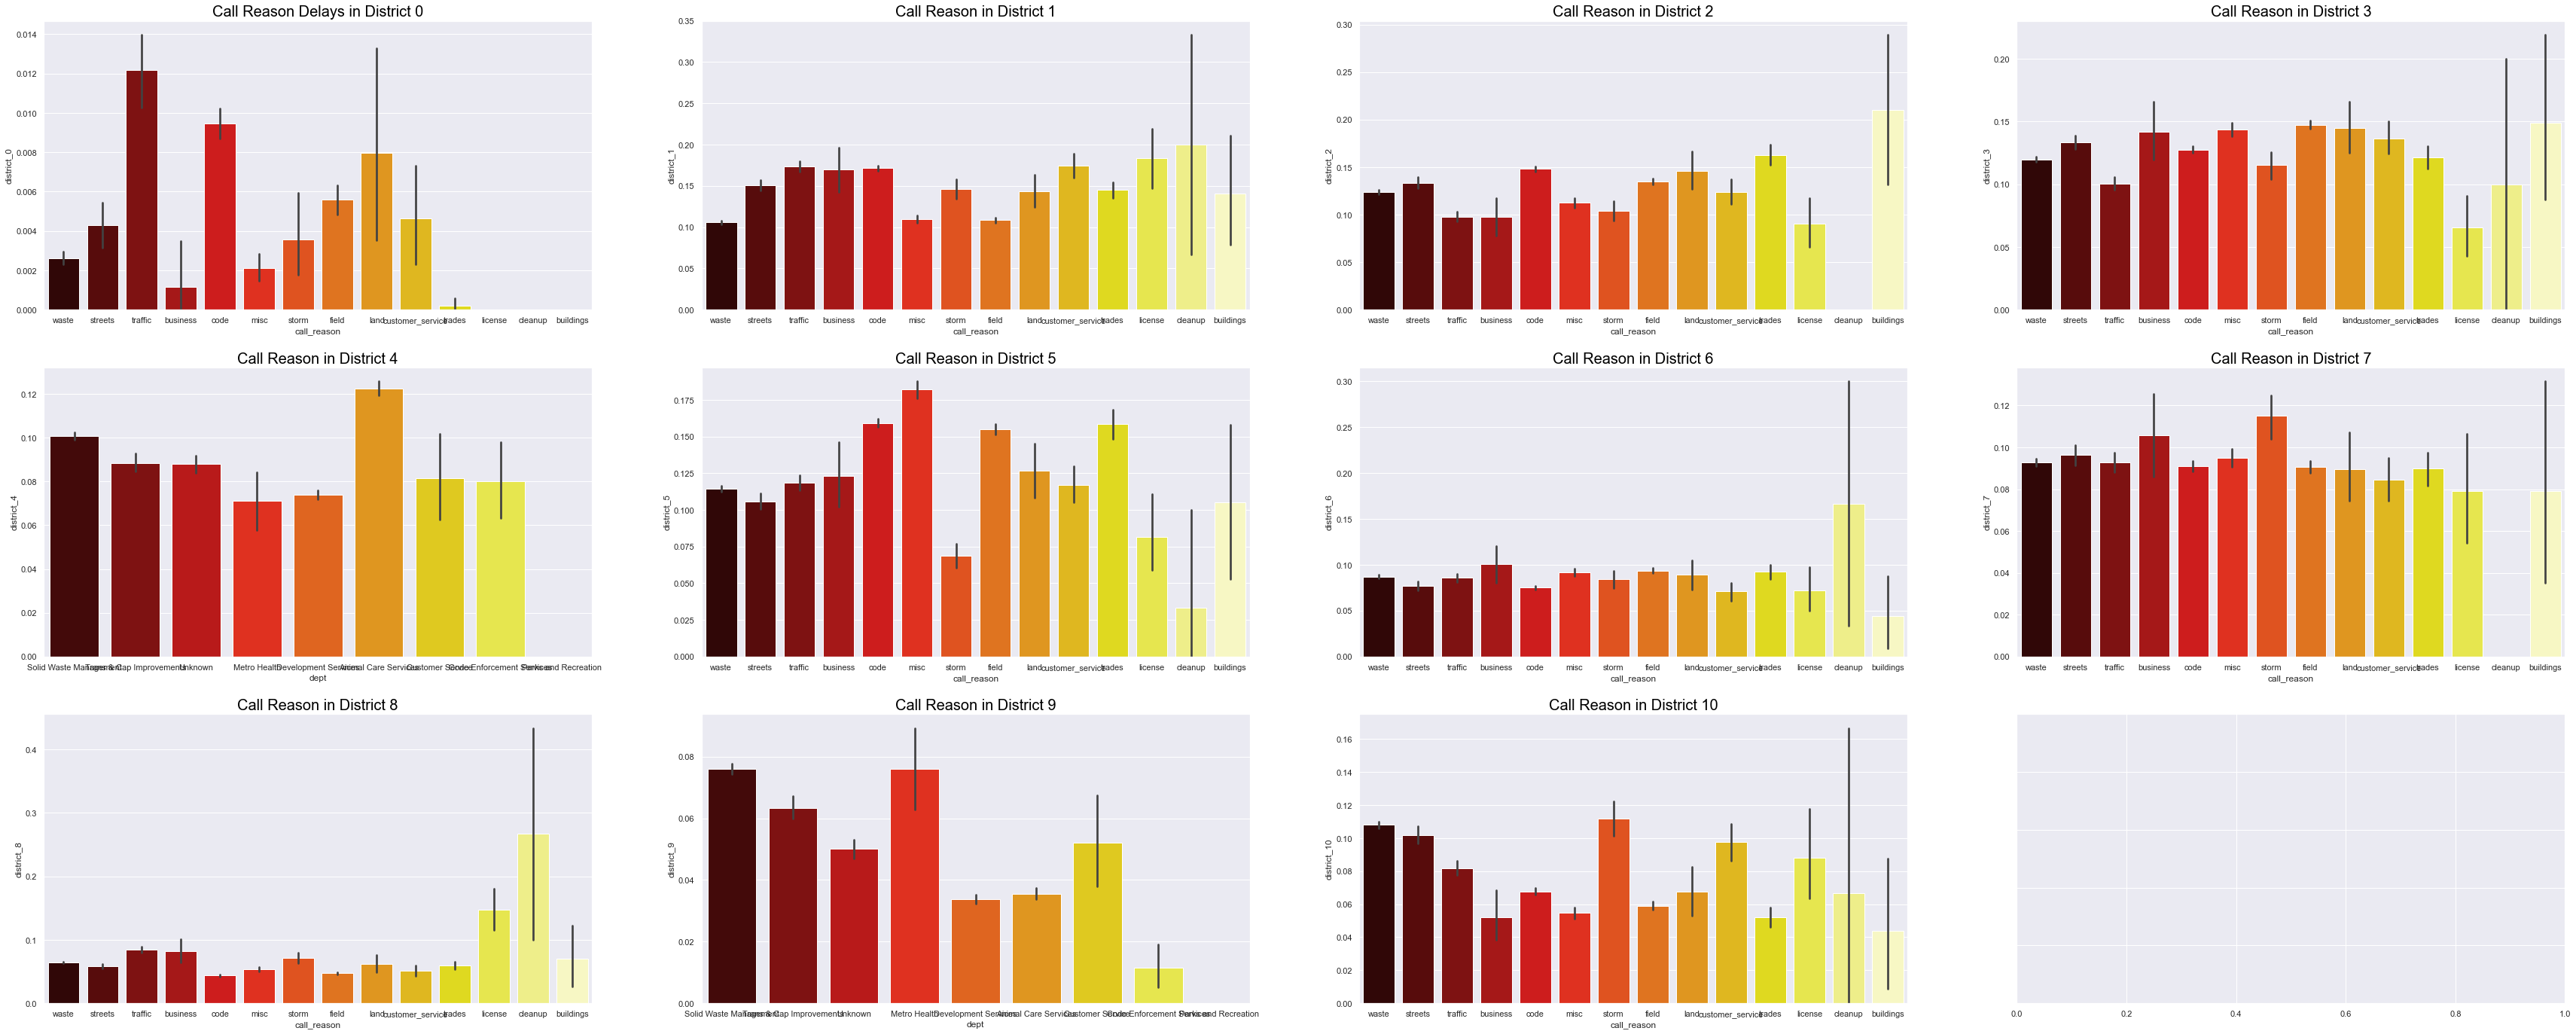

In [46]:
plt.subplots(3, 4, figsize=(60,24), sharey=True)
sns.set(style="darkgrid")


plt.subplot(3,4,1)
plt.title("Call Reason Delays in District 0", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_0', data=train,
               palette='hot')

plt.subplot(3,4,2)
plt.title("Call Reason Delays in District 1", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_1', data=train,
               palette='hot')

plt.subplot(3,4,3)
plt.title("Call Reason Delays in District 2", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_2', data=train,
               palette='hot')

plt.subplot(3,4,4)
plt.title("Call Reason Delays in District 3", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_3', data=train,
               palette='hot')

plt.subplot(3,4,5)
plt.title("Call Reason Delays in District 4", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_4', data=train,
               palette='hot')

plt.subplot(3,4,6)
plt.title("Call Reason Delays in District 5", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_5', data=train,
               palette='hot')

plt.subplot(3,4,7)
plt.title("Call Reason Delays in District 6", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_6', data=train,
               palette='hot')

plt.subplot(3,4,8)
plt.title("Call Reason Delays in District 7", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_7', data=train,
               palette='hot')

plt.subplot(3,4,9)
plt.title("Call Reason Delays in District 8", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_8', data=train,
               palette='hot')

plt.subplot(3,4,10)
plt.title("Call Reason Delays in District 9", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_9', data=train,
               palette='hot')

plt.subplot(3,4,11)
plt.title("Call Reason Delays in District 10", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_10', data=train,
               palette='hot')

plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428870 entries, 2497 to 495432
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   case_id                   428870 non-null  int64         
 1   open_date                 428870 non-null  datetime64[ns]
 2   due_date                  428870 non-null  datetime64[ns]
 3   closed_date               428870 non-null  datetime64[ns]
 4   is_late                   428870 non-null  object        
 5   dept                      428870 non-null  object        
 6   call_reason               428870 non-null  object        
 7   case_type                 428870 non-null  object        
 8   case_status               428870 non-null  object        
 9   source_id                 428870 non-null  object        
 10  address                   428870 non-null  object        
 11  council_district          428870 non-null  int64         
 12 

# Statistical Testing

## Council District

In [71]:
# normlaize makes it percentage
observe = pd.crosstab(train.council_district, train.level_of_delay, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The district and the level of delay are independent from each other"
alt_hypothesis = "The district and the delay are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)


I reject the hypothesis that: 
 The district and the level of delay are independent from each other
 
I move forward with my alternative hypothesis that 
 The district and the delay are dependent from one another.
 
The alpha is: 
 0.05
 
P Value is: 
 0.0


___

## Department

In [73]:
# normlaize makes it percentage
observe = pd.crosstab(train.dept, train.level_of_delay, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The department hadling a call and the level of delay are independent from each other"
alt_hypothesis = "The department and the delay are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the null hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)


I reject the null hypothesis that: 
 The department hadling a call and the level of delay are independent from each other
 
I move forward with my alternative hypothesis that 
 The department and the delay are dependent from one another.
 
The alpha is: 
 0.05
 
P Value is: 
 0.0


___

## Reason for Calling

In [75]:
# normlaize makes it percentage
observe = pd.crosstab(train.call_reason, train.level_of_delay, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The reason for the call and the level of delay are independent from each other"
alt_hypothesis = "The reason for calling and the delay are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)


I reject the hypothesis that: 
 The reason for the call and the level of delay are independent from each other
 
I move forward with my alternative hypothesis that 
 The reason for calling and the delay are dependent from one another.
 
The alpha is: 
 0.05
 
P Value is: 
 0.0


___

## Source ID

In [76]:
# normlaize makes it percentage
observe = pd.crosstab(train.source_id, train.level_of_delay, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The source of the report and the level of delay are independent from each other"
alt_hypothesis = "The source and the delay are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)


I reject the hypothesis that: 
 The source of the report and the level of delay are independent from each other
 
I move forward with my alternative hypothesis that 
 The source and the delay are dependent from one another.
 
The alpha is: 
 0.05
 
P Value is: 
 0.0


___

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428870 entries, 2497 to 495432
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   case_id                   428870 non-null  int64         
 1   open_date                 428870 non-null  datetime64[ns]
 2   due_date                  428870 non-null  datetime64[ns]
 3   closed_date               428870 non-null  datetime64[ns]
 4   is_late                   428870 non-null  object        
 5   dept                      428870 non-null  object        
 6   call_reason               428870 non-null  object        
 7   case_type                 428870 non-null  object        
 8   case_status               428870 non-null  object        
 9   source_id                 428870 non-null  object        
 10  address                   428870 non-null  object        
 11  council_district          428870 non-null  int64         
 12 